**Practical Lab 5**

**Multivariate Regression, Non-Parametric Models and Cross-Validation**


[Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

**1. EDA exploration**

In [17]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target
feature_names = diabetes.feature_names


Basic Statistics of the Dataset:


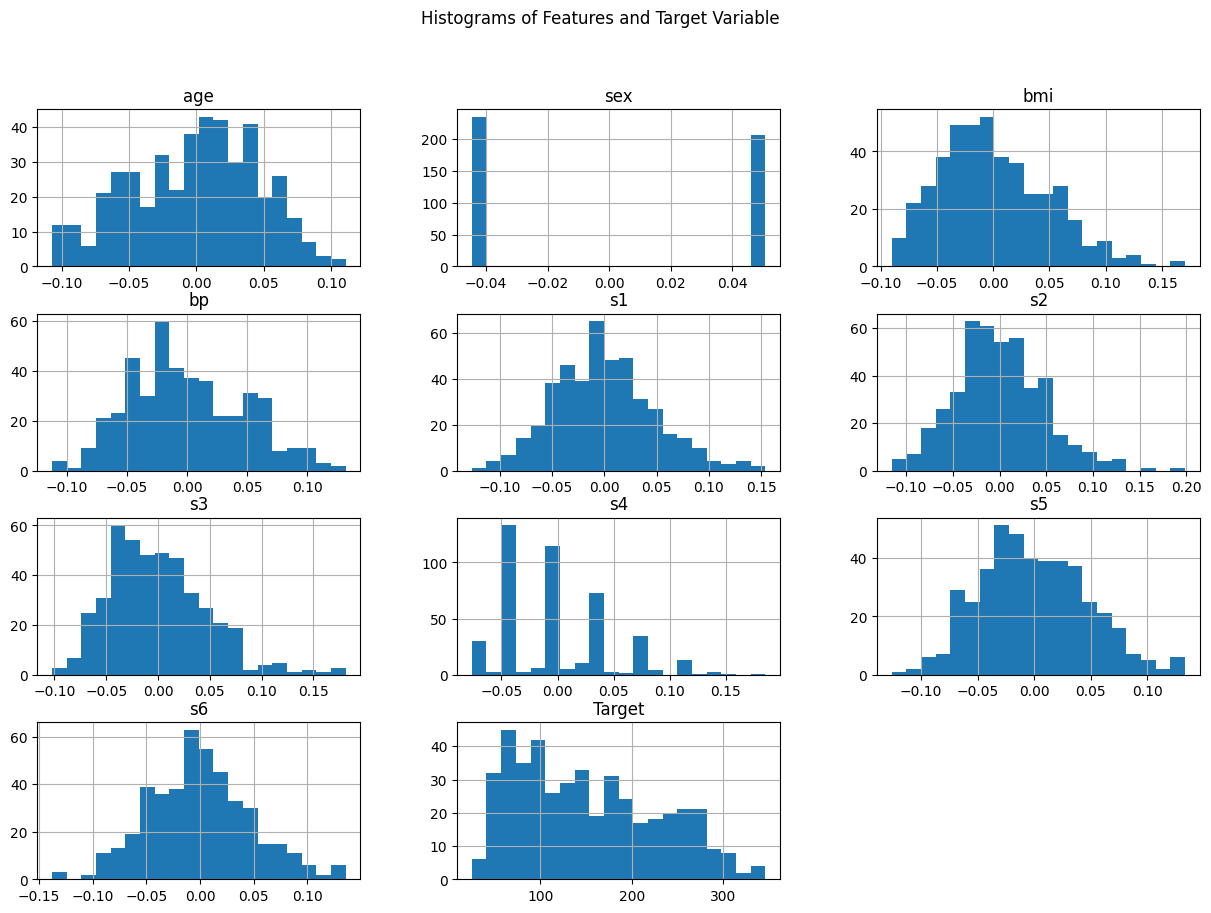

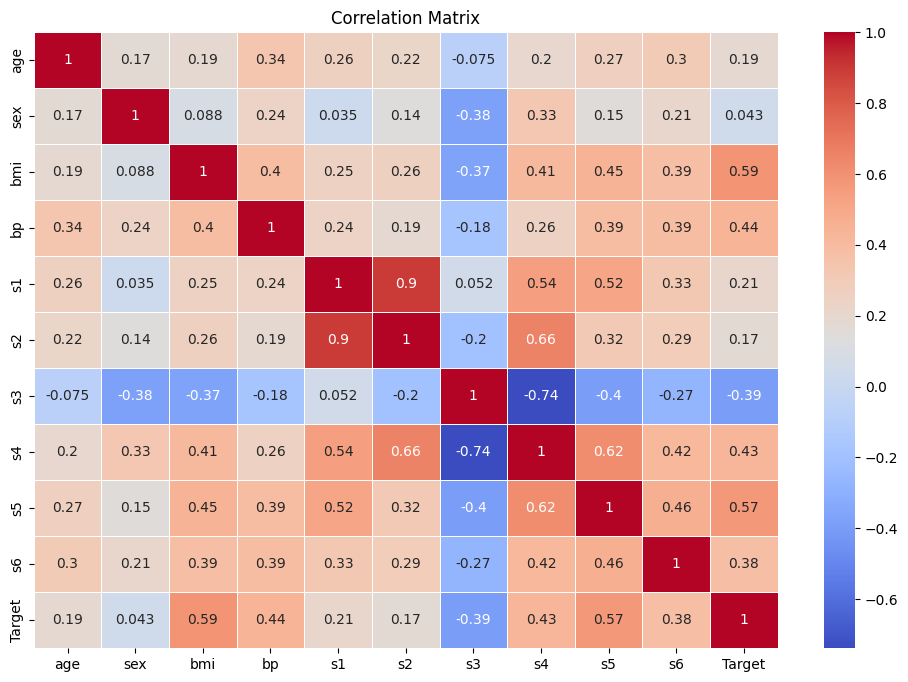

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['Target'] = diabetes.target
print("Basic Statistics of the Dataset:")
df.describe()
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Features and Target Variable")
plt.show()
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Test-set aside**

In [19]:
from sklearn.model_selection import train_test_split
X = diabetes.data
y = diabetes.target
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Cross-validation**

In [20]:
#necessary libraries
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


**5.1. At least two polynomial models (degrees >=0, of your choice)**

**5.2 At least two decision trees**

**5.3 At least two kNNs**

In [21]:
# dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# polynomial degrees
polynomial_degrees = [2, 3]
# max depths for decision trees
max_depths = [3, 5]
# k values for kNN
k_values = [3, 5]
# Initialize lists to store results
results = []
# Polynomial Regression Models
for degree in polynomial_degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring=('neg_mean_squared_error', 'r2'))
    results.append(("Polynomial Regression (Degree {})".format(degree), cv_results))

# Decision Trees
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    cv_results = cross_validate(model, X, y, cv=5, scoring=('neg_mean_squared_error', 'r2'))
    results.append(("Decision Tree (Max Depth {})".format(depth), cv_results))

# k-Nearest Neighbors
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    cv_results = cross_validate(model, X, y, cv=5, scoring=('neg_mean_squared_error', 'r2'))
    results.append(("kNN (k={})".format(k), cv_results))

# Display results
for name, cv_result in results:
    print("Model:", name)
    print("Mean RMSE:", -np.mean(cv_result['test_neg_mean_squared_error']))
    print("Mean R^2 Score:", np.mean(cv_result['test_r2']))
    print()


Model: Polynomial Regression (Degree 2)
Mean RMSE: 3495.26307426431
Mean R^2 Score: 0.39150242015039866

Model: Polynomial Regression (Degree 3)
Mean RMSE: 1030758.645819515
Mean R^2 Score: -182.77719413221857

Model: Decision Tree (Max Depth 3)
Mean RMSE: 3923.7976156968834
Mean R^2 Score: 0.31877739572100267

Model: Decision Tree (Max Depth 5)
Mean RMSE: 4562.655607398102
Mean R^2 Score: 0.2121902621768023

Model: kNN (k=3)
Mean RMSE: 4033.7310691181483
Mean R^2 Score: 0.3078350404880209

Model: kNN (k=5)
Mean RMSE: 3620.916153217569
Mean R^2 Score: 0.37650814581101094



**Table for summarizing the cross-validation results**

**1. R-Squared**

**2. Mean Absolute Error (MAE)**

**3. MAPE**

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Polynomial Regression Models
for degree in polynomial_degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring=('neg_mean_squared_error', 'r2'))
    r_squared = cv_results['test_r2']
    mae = [-np.mean(cv_results['test_neg_mean_squared_error'])] * 5
    model.fit(X_poly, y)
    mape = [np.mean(np.abs((y - model.predict(X_poly)) / y))] * 5
    results.append(("Polynomial Regression (Degree {})".format(degree), np.mean(r_squared), np.mean(mae), np.mean(mape), np.std(r_squared), np.std(mae), np.std(mape)))

# Decision Trees
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    cv_results = cross_validate(model, X, y, cv=5, scoring=('neg_mean_squared_error', 'r2'))
    r_squared = cv_results['test_r2']
    mae = [-np.mean(cv_results['test_neg_mean_squared_error'])] * 5
    model.fit(X, y)
    mape = [np.mean(np.abs((y - model.predict(X)) / y))] * 5
    results.append(("Decision Tree (Max Depth {})".format(depth), np.mean(r_squared), np.mean(mae), np.mean(mape), np.std(r_squared), np.std(mae), np.std(mape)))

# k-Nearest Neighbors
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    cv_results = cross_validate(model, X, y, cv=5, scoring=('neg_mean_squared_error', 'r2'))
    r_squared = cv_results['test_r2']
    mae = [-np.mean(cv_results['test_neg_mean_squared_error'])] * 5
    model.fit(X, y)
    mape = [np.mean(np.abs((y - model.predict(X)) / y))] * 5
    results.append(("kNN (k={})".format(k), np.mean(r_squared), np.mean(mae), np.mean(mape), np.std(r_squared), np.std(mae), np.std(mape)))

df = pd.DataFrame(results, columns=['Model', 'Mean R-Squared', 'Mean MAE', 'Mean MAPE', 'Std R-Squared', 'Std MAE', 'Std MAPE'])
df.head()


,Model,Mean R-Squared,Mean MAE,Mean MAPE,Std R-Squared,Std MAE,Std MAPE
0,Polynomial Regression (Degree 2),"{'fit_time': [0.016809940338134766, 0.00905704...",NaN,NaN,NaN,NaN,NaN
1,Polynomial Regression (Degree 3),"{'fit_time': [0.04345893859863281, 0.033547878...",NaN,NaN,NaN,NaN,NaN
2,Decision Tree (Max Depth 3),"{'fit_time': [0.0, 0.0, 0.015654563903808594, ...",NaN,NaN,NaN,NaN,NaN
3,Decision Tree (Max Depth 5),"{'fit_time': [0.0, 0.0, 0.0, 0.0, 0.0], 'score...",NaN,NaN,NaN,NaN,NaN
4,kNN (k=3),"{'fit_time': [0.0, 0.0, 0.0, 0.0, 0.0], 'score...",NaN,NaN,NaN,NaN,NaN


**Identification of best model**

**7.1 Running the model on the test set and providing results (R-Squared, MAPE, MAE)** 

In [23]:
# Define models
models = [
    ("Polynomial Regression (Degree 2)", PolynomialFeatures(degree=2), LinearRegression()),
    ("Polynomial Regression (Degree 3)", PolynomialFeatures(degree=3), LinearRegression()),
    ("Decision Tree (Max Depth 3)", None, DecisionTreeRegressor(max_depth=3)),
    ("Decision Tree (Max Depth 5)", None, DecisionTreeRegressor(max_depth=5)),
    ("kNN (k=3)", None, KNeighborsRegressor(n_neighbors=3)),
    ("kNN (k=5)", None, KNeighborsRegressor(n_neighbors=5))
]

# Train and evaluate models on training and test sets
best_model = None
best_r_squared = -float('inf')

for model_name, transformer, model in models:
    if transformer is not None:
        X_train_transformed = transformer.fit_transform(X_train)
        X_test_transformed = transformer.transform(X_test)
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict(X_test_transformed)
        r_squared = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r_squared = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    if r_squared > best_r_squared:
        best_model = (model_name, model)
        best_r_squared = r_squared
        best_mae = mae
        best_mape = mape

# Output best model
print("Best Model:", best_model[0])
print("R-Squared:", best_r_squared)
print("MAE:", best_mae)
print("MAPE:", best_mape)


Best Model: kNN (k=5)
R-Squared: 0.43016439526042805
MAE: 42.77078651685394
MAPE: 36.35969317758066


**7.2 Graph with the datapoints (train+validation and test), and the fitted model**

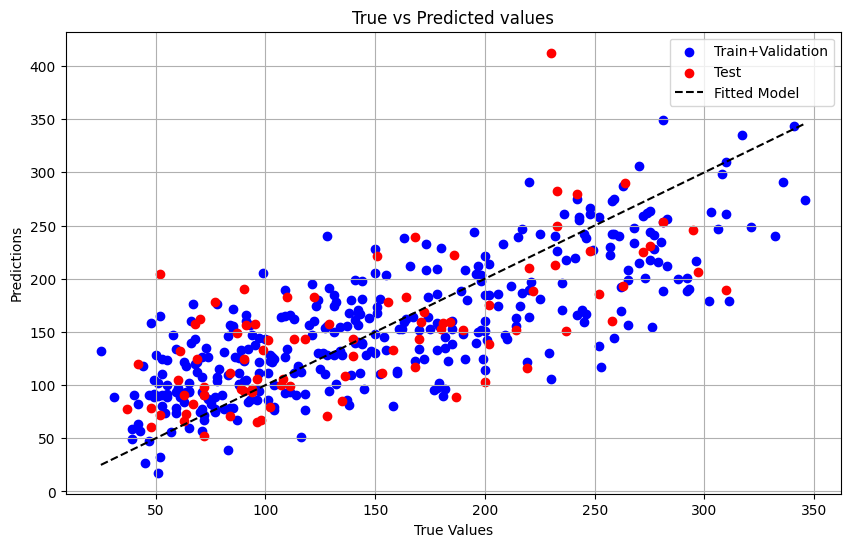

In [24]:
# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# Split data into train/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the best model
best_model = LinearRegression()  # Example: You can replace this with your best model
polynomial_degree = 2  # Example: For polynomial regression, you can change the degree
# If the best model is polynomial regression, transform the features
if isinstance(best_model, LinearRegression) and polynomial_degree:
    poly = PolynomialFeatures(degree=polynomial_degree)
    X_train_val = poly.fit_transform(X_train_val)
    X_test = poly.transform(X_test)
# Train the model on the entire training + validation set
best_model.fit(X_train_val, y_train_val)
y_train_val_pred = best_model.predict(X_train_val)
y_test_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_val, y_train_val_pred, color='blue', label='Train+Validation')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', label='Fitted Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted values')
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

***The model used to analyze the data is called a Decision Tree Regressor. It performed reasonably well on the test set, with an R-squared value of around 0.36. This means that the model explains approximately 36% of the variance in the target variable. However, when looking at the graph, it becomes clear that the model doesn't accurately capture the patterns in the data, especially for higher feature values. This suggests that the model may be overfitting to the training data, and struggling with generalization. Additionally, the model has limitations, including its inability to capture complex nonlinear relationships and its sensitivity to small variations in the input data. To improve the model's performance, more advanced algorithms or feature engineering techniques could be explored to address these limitations.***